# Benchmarking Image Quality (plots)

## Imports

In [184]:
import os 
import sys
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

## Helper functions

In [185]:
def load_experiment(experiment_name):

    ### process (combined) data frame
    experiment_files = list(sorted(glob(f"{experiment_name}/*_metrics.csv")))

    df = None
    for i, experiment_file in enumerate(experiment_files):
        df_exp = pd.read_csv(experiment_file)
        if df is None:
            df = df_exp.copy()
        else:
            df = pd.concat((df, df_exp), axis=0)

    if df is None:
        print(f"No *_metrics.csv found for experiment_name={experiment_name}")
    
    ### assign experiment name
    df = df.assign(experiment_name = experiment_name)
    
    return df


def load_experiments(experiment_names):
    
    df = None
    for i, experiment_name in enumerate(experiment_names):
        df_exp = load_experiment(experiment_name)
        if df is None:
            df = df_exp.copy()
        else:
            df = pd.concat((df, df_exp), axis=0, ignore_index=True)
    return df
    

## Load result files

In [187]:
# define which experiments to load
experiment_names = [
    
    # TreeRing
    'TreeRing_ImageDistortion_gaussian_blur_r_8',
    'TreeRing_DiffWMAttacker',
    'TreeRing_VAEWMAttacker_bmshj2018-factorized',
    'TreeRing_Rinse4x',
    'TreeRing_InPaint_ReplaceBG',
    
    # StegaStamp
    'StegaStamp_ImageDistortion_gaussian_blur_r_8',
    'StegaStamp_DiffWMAttacker',
    'StegaStamp_VAEWMAttacker_bmshj2018-factorized',
    'StegaStamp_Rinse4x',
    'StegaStamp_InPaint_ReplaceBG',
    
    # StableSig
    'StableSig_ImageDistortion_gaussian_blur_r_8',
    'StableSig_DiffWMAttacker',
    'StableSig_VAEWMAttacker_bmshj2018-factorized',
    'StableSig_Rinse4x',
    'StableSig_InPaint_ReplaceBG',
    
    # Invisible
    'Invisible_ImageDistortion_gaussian_blur_r_8',
    'Invisible_DiffWMAttacker',
    'Invisible_VAEWMAttacker_bmshj2018-factorized',
    'Invisible_Rinse4x',
    'Invisible_InPaint_ReplaceBG',
    
]

In [188]:
# load the experiment result files
df_ = load_experiments(experiment_names)

# display number of successful prompts 
df_.groupby("experiment_name").count()[['prompt_index']]

,prompt_index
experiment_name,
Invisible_DiffWMAttacker,1000
Invisible_ImageDistortion_gaussian_blur_r_8,1000
Invisible_InPaint_ReplaceBG,1000
Invisible_Rinse4x,1000
Invisible_VAEWMAttacker_bmshj2018-factorized,1000
StableSig_DiffWMAttacker,1000
StableSig_ImageDistortion_gaussian_blur_r_8,1000
StableSig_InPaint_ReplaceBG,1000
StableSig_Rinse4x,1000


## Compute additional metrics

In [189]:
# Assign watermark type
df_ = df_.assign(wm_type = [_.split('_')[0] for _ in df_.experiment_name])

## Compute Average Watermark Removal Metrics (Table 3)

In [190]:
# select watermark removal metric columns
use_columns = [
    ### clip scores
    # 'no_w_no_attack_sim', 'no_w_sim', 
    #    'w_no_attack_sim',    'w_sim',
    ### image quality scores
    # 'no_w_mse',  'no_w_no_bg_mse',
       'w_mse',     'w_no_bg_mse',
    # 'no_w_ssim', 'no_w_no_bg_ssim',
       'w_ssim',    'w_no_bg_ssim',
    # 'no_w_psnr', 'no_w_no_bg_psnr',
       'w_psnr',    'w_no_bg_psnr',
    ### other
    'w_pct_mask', 'experiment_name'
]


# extract watermark removal metrics
df = df_[use_columns].groupby("experiment_name").mean()
df = df.loc[experiment_names]

# show dataframe
df

,w_mse,w_no_bg_mse,w_ssim,w_no_bg_ssim,w_psnr,w_no_bg_psnr,w_pct_mask
experiment_name,,,,,,,
TreeRing_ImageDistortion_gaussian_blur_r_8,0.009659,0.004352,0.601812,0.841930,21.229075,25.740675,0.612084
TreeRing_DiffWMAttacker,0.003139,0.001350,0.790785,0.920331,25.954536,30.725342,0.612084
TreeRing_VAEWMAttacker_bmshj2018-factorized,0.001937,0.000839,0.797174,0.922182,28.066511,32.890475,0.612084
TreeRing_Rinse4x,0.007884,0.003389,0.631359,0.858391,21.623361,26.347835,0.612084
TreeRing_InPaint_ReplaceBG,0.064289,0.000942,0.464381,0.949078,12.832213,31.710015,0.612084
StegaStamp_ImageDistortion_gaussian_blur_r_8,0.010102,0.004106,0.566705,0.848314,20.941169,26.328824,0.656240
StegaStamp_DiffWMAttacker,0.003710,0.001415,0.749629,0.914914,25.081418,30.609771,0.656240
StegaStamp_VAEWMAttacker_bmshj2018-factorized,0.002173,0.000830,0.772931,0.922564,27.491831,33.066552,0.656240
StegaStamp_Rinse4x,0.008889,0.003378,0.588478,0.860513,21.042043,26.679222,0.656240


## Compute p-value vs. image quality curves (across different strengths)

In [191]:
# p-value version
p_thresholds = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.001, 0.0001, 0.00001, 0.000001,  0.0000001]
bit_acc_thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

# store results for plotting
success_scores = dict()
quality_scores = dict()

# loop over experiments, thresholds
for experiment_name in experiment_names:
    print(f"{experiment_name}")
    
    # initialize lists for storing results
    success_scores[experiment_name] = {'w_p':[], 'w_bit_acc': []}
    quality_scores[experiment_name] = {'w_no_bg_mse':[], 'w_no_bg_ssim':[],'w_no_bg_psnr':[]}

    # extract experiment results
    df_exp = df_[df_.experiment_name.eq(experiment_name)] 

    # loop over thresholds
    for i,_ in enumerate(p_thresholds):
        
        # extract results for threshold
        if 'TreeRing' in experiment_name:
            success_metric_name = 'w_p'
            df_thr = df_exp[df_exp.w_p.ge(p_thresholds[i])]
        else:
            success_metric_name = 'w_bit_acc'
            df_thr = df_exp[df_exp.w_bit_acc.le(bit_acc_thresholds[i])]
            
        print(f"    len(df_thr) = {len(df_thr)}")

        # compute average p-value as the y-coordinate (or just use the threshold?)
        success_score = df_thr[success_metric_name].mean()
        success_scores[experiment_name][success_metric_name].append(success_score)

        # compute average (masked) image quality metric as the x-coordinate
        for quality_metric_name in quality_scores[experiment_name]:
            quality_score = df_thr[quality_metric_name].mean()
            quality_scores[experiment_name][quality_metric_name].append(quality_score)



TreeRing_ImageDistortion_gaussian_blur_r_8
    len(df_thr) = 0
    len(df_thr) = 0
    len(df_thr) = 0
    len(df_thr) = 0
    len(df_thr) = 0
    len(df_thr) = 1
    len(df_thr) = 5
    len(df_thr) = 13
    len(df_thr) = 24
    len(df_thr) = 39
    len(df_thr) = 60
TreeRing_DiffWMAttacker
    len(df_thr) = 1
    len(df_thr) = 1
    len(df_thr) = 3
    len(df_thr) = 6
    len(df_thr) = 7
    len(df_thr) = 11
    len(df_thr) = 27
    len(df_thr) = 58
    len(df_thr) = 101
    len(df_thr) = 156
    len(df_thr) = 203
TreeRing_VAEWMAttacker_bmshj2018-factorized
    len(df_thr) = 0
    len(df_thr) = 1
    len(df_thr) = 6
    len(df_thr) = 13
    len(df_thr) = 27
    len(df_thr) = 35
    len(df_thr) = 78
    len(df_thr) = 147
    len(df_thr) = 220
    len(df_thr) = 278
    len(df_thr) = 353
TreeRing_Rinse4x
    len(df_thr) = 4
    len(df_thr) = 22
    len(df_thr) = 44
    len(df_thr) = 64
    len(df_thr) = 123
    len(df_thr) = 173
    len(df_thr) = 312
    len(df_thr) = 455
    len(df_thr) 

In [296]:
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.color_palette("Spectral", 5)

In [297]:
exp_names = []
for experiment_name in experiment_names:
    experiment_name2 = experiment_name
    experiment_name2 = experiment_name2.replace("InPaint_ReplaceBG", "SemanticRegen")
    experiment_name2 = experiment_name2.replace("_bmshj2018-factorized", "")
    experiment_name2 = experiment_name2.replace("_gaussian_blur_r_8", "")
    experiment_name2 = "_".join(experiment_name2.split("_")[1:]) 

    exp_names.append(experiment_name2)
exp_names = list(set(exp_names))
exp_names  

exp_names = [
 'ImageDistortion',
 'DiffWMAttacker',
 'VAEWMAttacker',
 'Rinse4x',
 'SemanticRegen',
]

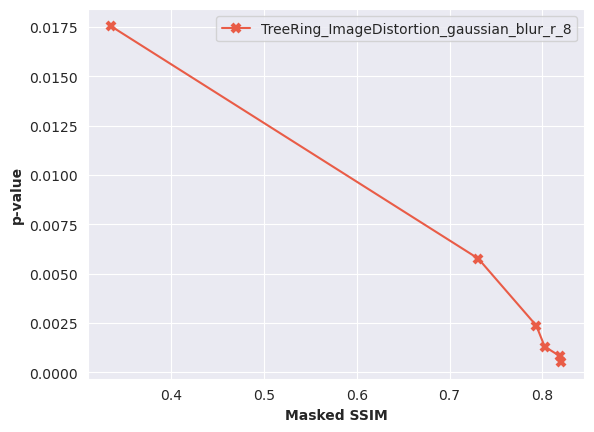

In [298]:
# plot curve based on success_scores, quality_scores

experiment_name = experiment_names[0]
quality_metric_name = 'w_no_bg_ssim'

xs = quality_scores[experiment_name][quality_metric_name]
ys = success_scores[experiment_name]['w_p']


# sns.lineplot(x=xs, y=ys, markers=True)
plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name, c=cmap[0])
plt.ylabel("p-value", fontweight="bold")
plt.xlabel(f"Masked {quality_metric_name.split('_')[-1].upper()}", fontweight="bold")
plt.legend()
plt.show()

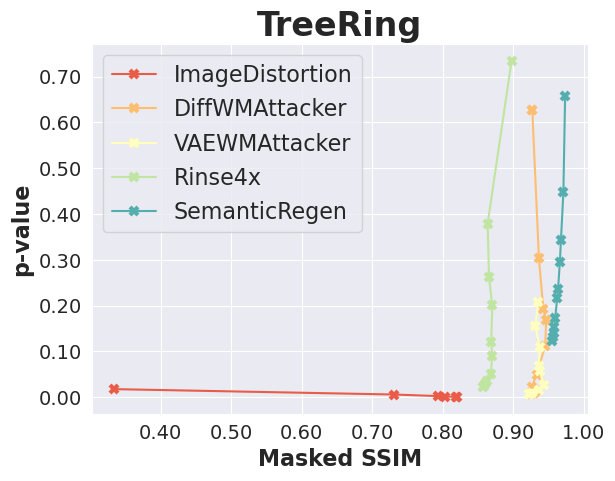

In [299]:
# plot curve based on success_scores, quality_scores (p-value) 

wm_type = "TreeRing"

# loop over image quality metrics
for quality_metric_name in ["w_no_bg_ssim"]:
    
    fig = plt.figure()

    success_metric_name = 'w_p'
    for experiment_name in experiment_names[:]:
        
        if wm_type not in experiment_name:
            continue

        xs = quality_scores[experiment_name][quality_metric_name]
        ys = success_scores[experiment_name][success_metric_name]
        
        experiment_name2 = experiment_name
        experiment_name2 = experiment_name2.replace("InPaint_ReplaceBG", "SemanticRegen")
        experiment_name2 = experiment_name2.replace("_bmshj2018-factorized", "")
        experiment_name2 = experiment_name2.replace("_gaussian_blur_r_8", "")
        experiment_name2 = experiment_name2.replace(f"{wm_type}_", "")

        
        # plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name, color="red")
        plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name2, c=cmap[exp_names.index(experiment_name2)])

    plt.ylabel("p-value", fontweight="bold", fontsize=16)
    plt.xlabel(f"Masked {quality_metric_name.split('_')[-1].upper()}", fontweight="bold", fontsize=16)
    plt.title(f"{wm_type}", fontweight="bold", fontsize=24)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    from matplotlib.ticker import StrMethodFormatter
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.svg")
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.png")
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.pdf")

    plt.legend(loc='upper left', fontsize=16)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}_legend.svg")
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}_legend.png")
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}_legend.pdf")

    plt.show()

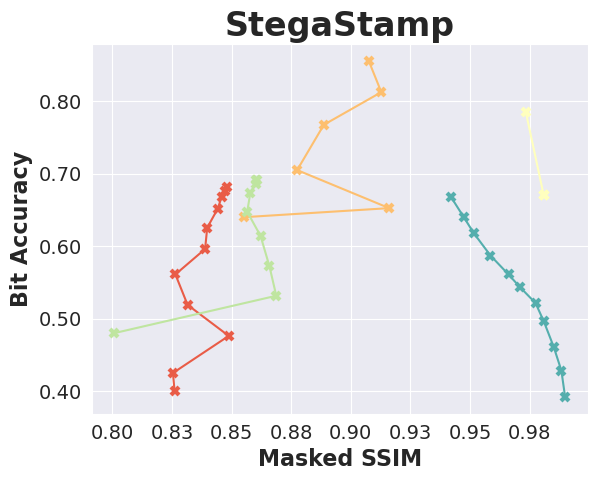

In [300]:
# plot curve based on success_scores, quality_scores

wm_type = "StegaStamp"

for quality_metric_name in ["w_no_bg_ssim"]:

    fig = plt.figure()
    
    success_metric_name = 'w_bit_acc'
    for experiment_name in experiment_names[:]:

        if wm_type not in experiment_name:
            continue
            
        xs = quality_scores[experiment_name][quality_metric_name]
        ys = success_scores[experiment_name][success_metric_name]

        experiment_name2 = experiment_name
        experiment_name2 = experiment_name2.replace("InPaint_ReplaceBG", "SemanticRegen")
        experiment_name2 = experiment_name2.replace("_bmshj2018-factorized", "")
        experiment_name2 = experiment_name2.replace("_gaussian_blur_r_8", "")
        experiment_name2 = experiment_name2.replace(f"{wm_type}_", "")

        plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name2, c=cmap[exp_names.index(experiment_name2)])

    plt.ylabel("Bit Accuracy", fontweight="bold", fontsize=16)
    plt.xlabel(f"Masked {quality_metric_name.split('_')[-1].upper()}", fontweight="bold", fontsize=16)
    plt.title(f"{wm_type}", fontweight="bold", fontsize=24)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    
    from matplotlib.ticker import StrMethodFormatter
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

    # plt.legend(loc='upper left', fontsize=16)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.svg", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.png", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.pdf", dpi=600)

    plt.show()

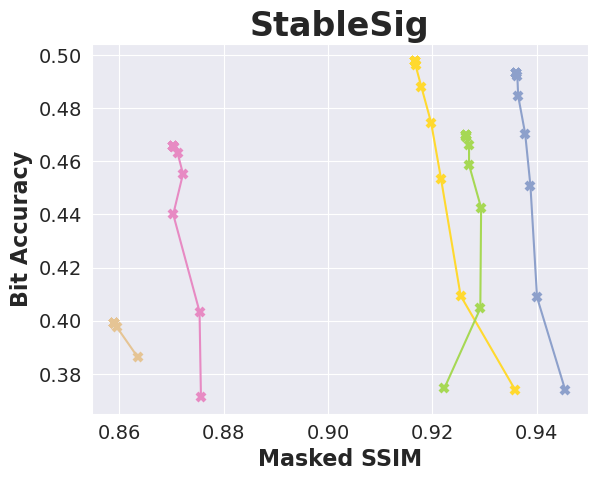

In [286]:
# plot curve based on success_scores, quality_scores

wm_type = "StableSig"

for quality_metric_name in ["w_no_bg_ssim"]:
    
    fig = plt.figure()
    
    success_metric_name = 'w_bit_acc'
    for experiment_name in experiment_names[:]:

        if wm_type not in experiment_name:
            continue
            
        xs = quality_scores[experiment_name][quality_metric_name]
        ys = success_scores[experiment_name][success_metric_name]

        experiment_name2 = experiment_name
        experiment_name2 = experiment_name2.replace("InPaint_ReplaceBG", "SemanticRegen")
        experiment_name2 = experiment_name2.replace("_bmshj2018-factorized", "")
        experiment_name2 = experiment_name2.replace("_gaussian_blur_r_8", "")
        experiment_name2 = experiment_name2.replace(f"{wm_type}_", "")

        plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name2, c=cmap[exp_names.index(experiment_name2)])

    plt.ylabel("Bit Accuracy", fontweight="bold", fontsize=16)
    plt.xlabel(f"Masked {quality_metric_name.split('_')[-1].upper()}", fontweight="bold", fontsize=16)
    plt.title(f"{wm_type}", fontweight="bold", fontsize=24)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    from matplotlib.ticker import StrMethodFormatter
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

    # plt.legend(loc='upper left', fontsize=16)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.svg", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.png", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.pdf", dpi=600)
    plt.show()


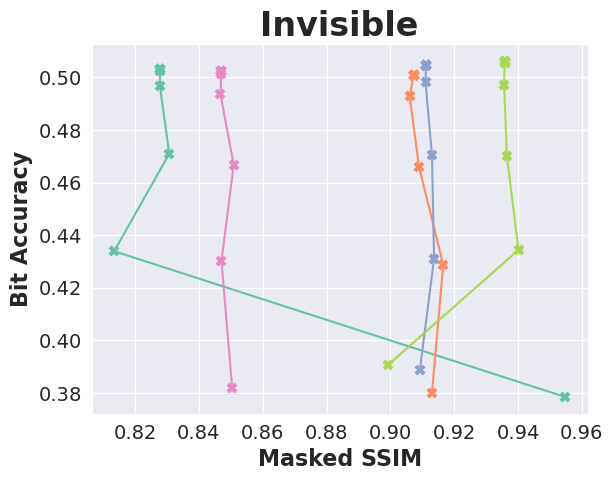

In [257]:
# plot curve based on success_scores, quality_scores

wm_type = "Invisible"

for quality_metric_name in ["w_no_bg_ssim"]:
    
    fig = plt.figure()
    
    success_metric_name = 'w_bit_acc'
    for experiment_name in experiment_names[:]:

        if wm_type not in experiment_name:
            continue
            
        xs = quality_scores[experiment_name][quality_metric_name]
        ys = success_scores[experiment_name][success_metric_name]

        experiment_name2 = experiment_name
        experiment_name2 = experiment_name2.replace("InPaint_ReplaceBG", "SemanticRegen")
        experiment_name2 = experiment_name2.replace("_bmshj2018-factorized", "")
        experiment_name2 = experiment_name2.replace("_gaussian_blur_r_8", "")
        experiment_name2 = experiment_name2.replace(f"{wm_type}_", "")

        plt.plot(xs, ys, "x-", markersize=6, mew=3, label=experiment_name2, c=cmap[exp_names.index(experiment_name2)])

    plt.ylabel("Bit Accuracy", fontweight="bold", fontsize=16)
    plt.xlabel(f"Masked {quality_metric_name.split('_')[-1].upper()}", fontweight="bold", fontsize=16)
    plt.title(f"{wm_type}", fontweight="bold", fontsize=24)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

    from matplotlib.ticker import StrMethodFormatter
    # plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

    # plt.legend(loc='upper left', fontsize=16)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.svg", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.png", dpi=600)
    plt.savefig(f"{wm_type}_{success_metric_name}_vs_{quality_metric_name}.pdf", dpi=600)
    plt.show()